In [16]:
import os
from urllib.request import urlretrieve # allows retrieving data from a URL
import pandas as pd
%matplotlib inline # a notebook setting, so that plots would be inline the whole notebook
import matplotlib.pyplot as plt
plt.style.use('seaborn')

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename= 'Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(URL, 'Fremont.csv') 
    data = pd.read_csv('Fremont.csv', index_col = 'Date', parse_dates = True)
    data.columns = ['East', 'West']
    data['Total'] = data['East'] + data['West']
    return data

In [17]:
data = get_fremont_data()

In [18]:
data.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


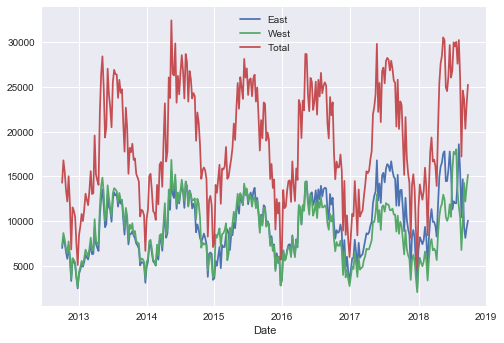

In [19]:
data.resample('W').sum().plot() # resample by week for a pandas dataframe, up-binning to do a Daily/Weekly/Yearly resample, down-binning also possible

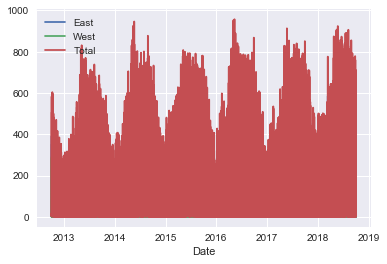

In [20]:
data.plot()

(0, 1080850.45)

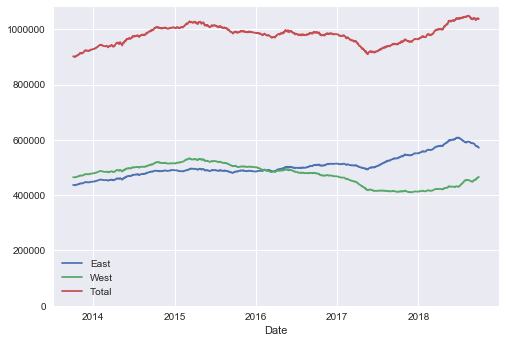

In [22]:
ax = data.resample('D').sum().rolling(365).sum().plot() #resample up-binning to do a daily/weekly/yearly resample
ax.set_ylim(0,None)

(0, 1080850.45)

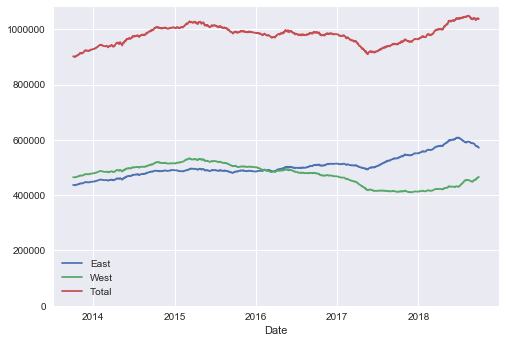

In [23]:
data['Total']=data['East']+data['West']
ax = data.resample('D').sum().rolling(365).sum().plot() #resample up-binning to do a daily/weekly/yearly resample
ax.set_ylim(0,None)

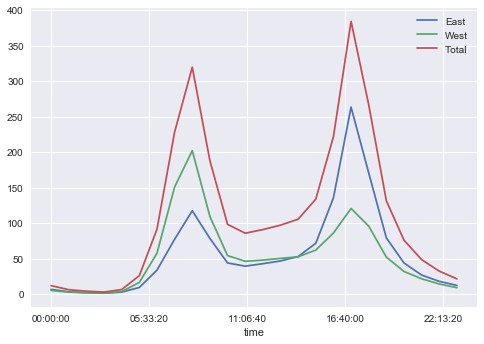

In [24]:
data.groupby(data.index.time).mean().plot()

In [25]:
pivoted = data.pivot_table('Total', index = data.index.time, columns = data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


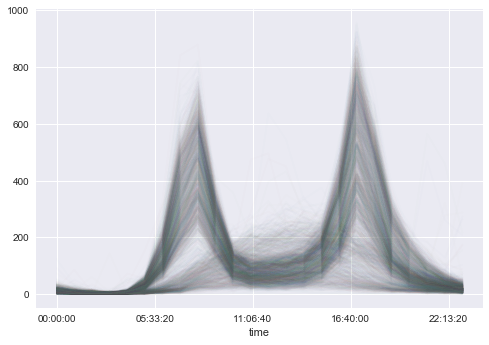

In [26]:
pivoted.plot(legend=False, alpha=0.01) #alpha degree of transparency

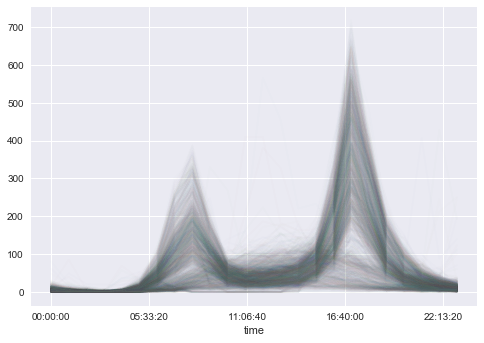

In [27]:
pivoted_east = data.pivot_table('East', index = data.index.time, columns = data.index.date)
pivoted_east.plot(legend=False, alpha=0.01) #alpha degree of transparency

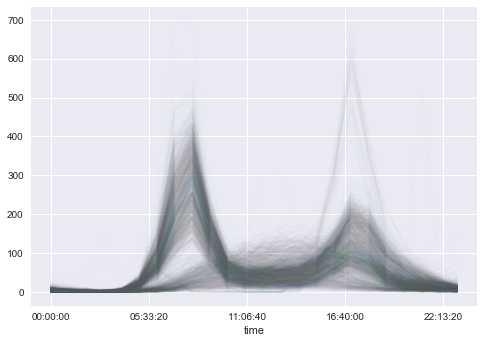

In [28]:
pivoted_west = data.pivot_table('West', index = data.index.time, columns = data.index.date) # pivot by date and index by time
pivoted_west.plot(legend=False, alpha=0.01) #alpha degree of transparency